## Método de Newton

Implementação do método

In [4]:
f(x) = x^2 - 2
fd(x) = 2x
x = 1.0
x = big"1"

1

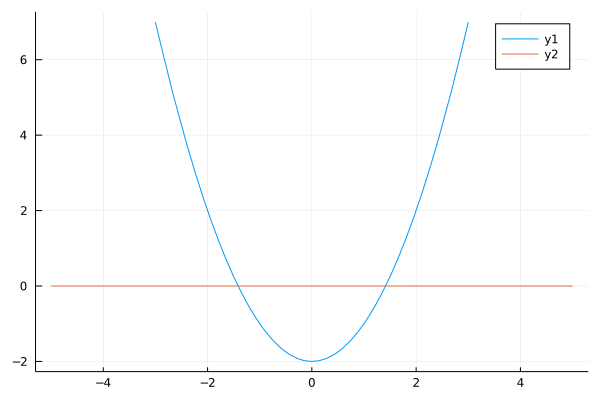

In [8]:
# Plotando f(x) para ter uma ideia de onde está o 0
using Plots
plot(f, -3, 3)
plot!(zero)

In [9]:
# Rodando várias vezes começa a convergir para o zero
x = x - f(x) / fd(x)
x, f(x)

(1.416666666666666666666666666666666666666666666666666666666666666666666666666661, 0.006944444444444444444444444444444444444444444444444444444444444444444444444417576)

O método de Newton tem convergência quadrática, é bem mais rápido que o método da bissecção.

In [10]:
"""
    (x, fx, exitflag) = newton(f, x)
"""
function newton(f, fd, x;
                atol = 1e-8, rtol = 1e-8,
                max_tempo = 10.0, max_iter = 1000,
                )
    fx = f(x)
    ϵ = atol + rtol * abs(fx)
    
    iter = 0
    t0 = time()
    Δt = time() - t0
    
    exitflag = :desconhecido
    resolvido = (abs(fx) ≤ ϵ)
    cansado   = (iter ≥ max_iter || Δt ≥ max_tempo)
    
    while !(resolvido || cansado)
        fdx = fd(x)
        if abs(fdx) ≤ ϵ
            exitflag = :derivada_nula
            break
        end
        x = x - fx / fdx
        fx = f(x)
        
        iter += 1
        Δt = time() - t0
        resolvido = (abs(fx) ≤ ϵ)
        cansado   = (iter ≥ max_iter || Δt ≥ max_tempo)
    end
    
    if resolvido
        exitflag = :sucesso
    elseif cansado
        if iter ≥ max_iter
            exitflag = :max_iter
        else
            exitflag = :max_tempo
        end
    end
    
    return x, fx, exitflag
end

newton

In [11]:
newton(f, fd, 1.0)

(1.4142135623746899, 4.510614104447086e-12, :sucesso)

In [12]:
newton(f, fd, big"1", atol=1e-100, rtol=0.0)

(1.414213562373095048801688724209698078569671875376948073176679737990732478462102, -1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77, :max_iter)

In [13]:
f(x) = x * exp(x) - 1
fd(x) = exp(x) + x * exp(x)

fd (generic function with 1 method)

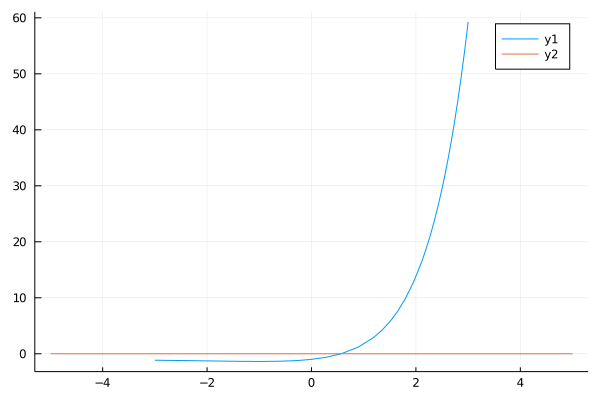

In [14]:
# Plotando f(x) para ter uma ideia de onde está o 0
plot(f, -3, 3)
plot!(zero)

In [15]:
newton(f, fd, 1.0)

(0.5671432965302959, 1.6912338640651114e-8, :sucesso)

In [16]:
newton(f, fd, 0.0)

(0.5671432965302959, 1.6912338640651114e-8, :sucesso)

In [19]:
n = 48
V = 40_000
p = 1200
function eq_price(i)
    if i == 0
        return p - V / n
    else
        return p - V * (1 + i)^n * i / ((1 + i)^n - 1)
    end
end

eq_price (generic function with 1 method)

In [21]:
using ForwardDiff

eq_price_der(i) = ForwardDiff.derivative(eq_price, i)
newton(eq_price, eq_price_der, 1.0)

(0.015990923866072523, -3.1130025490710977e-6, :sucesso)

## Fractal de $x^3 - x$

Fractal é um objeto em que suas partes separadas repetem os traços do todo completo

┌ Info: Saved animation to 
│   fn = C:\Users\rodri\Desktop\CalcNum\exemplo.gif
└ @ Plots C:\Users\rodri\.julia\packages\Plots\lmp2A\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\rodri\\Desktop\\CalcNum\\exemplo.gif")
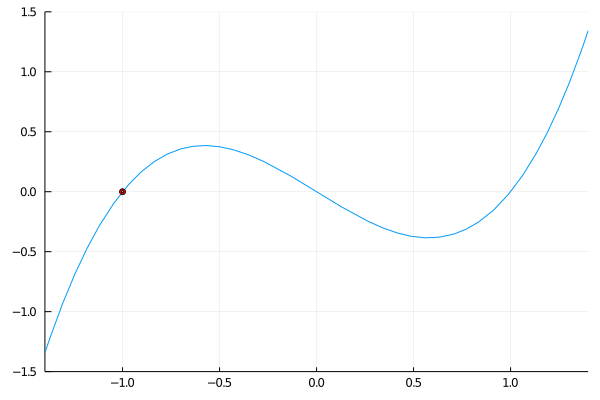

In [36]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1

anim = Animation()
for x = -1.0:0.01:1.0
    plot(f, -1.4, 1.4, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    local x
    for k=1:3
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end
    
    xlims!(-1.4, 1.4)
    ylims!(-1.5,1.5)
    frame(anim)
end

gif(anim, "exemplo.gif", fps=30)

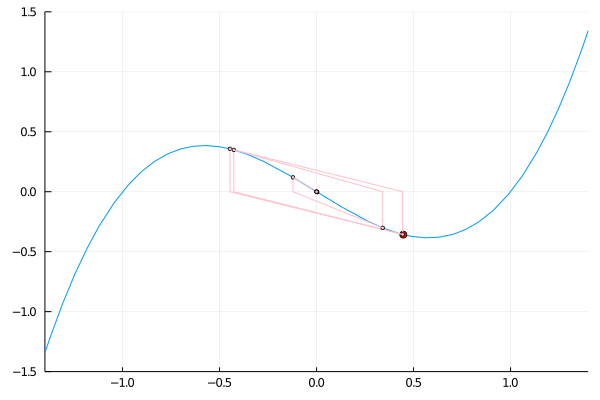

In [44]:
x = sqrt(3) / 3 - 0.115
x = sqrt(5) / 5 - 1e-4
plot(f, -1.4, 1.4, leg=false)
scatter!([x], [f(x)], c=:red, ms=4)
local x
for k=1:10
    xp = x - f(x) / fd(x)
    plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
    scatter!([xp], [f(xp)], c=:pink, ms=2)
    x = xp
end

xlims!(-1.4, 1.4)
ylims!(-1.5,1.5)

┌ Info: Saved animation to 
│   fn = C:\Users\rodri\Desktop\CalcNum\exemplo.gif
└ @ Plots C:\Users\rodri\.julia\packages\Plots\lmp2A\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\rodri\\Desktop\\CalcNum\\exemplo.gif")
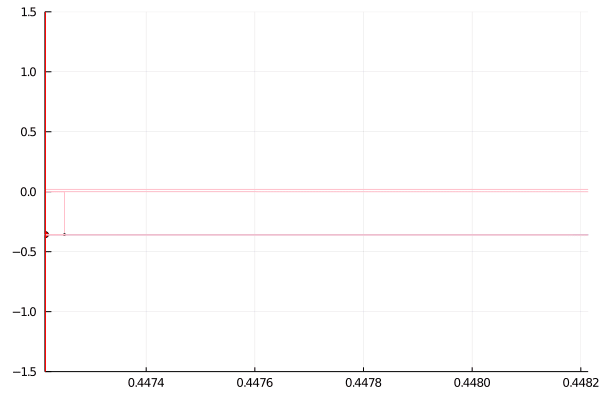

In [49]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1

anim = Animation()
X = []
C = []
colors = [:red, :green, :blue]
r0 = sqrt(5) / 5
rf = r0 + 0.001
I = r0 .+ exp.(range(log(1e-6),
                     log(rf - r0 - 1e-4), length=100))
for x = I
    plot(f, r0, rf, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    push!(X, x)
    local x
    for k = 1:10
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end
    j = argmin(abs.(x .- [-1, 0, 1]))
    push!(C, colors[j])
    for (xi,ci) in zip(X,C)
        plot!([xi, xi], [-1.5, 1.5], c=ci)
    end

    xlims!(r0, rf)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "exemplo.gif", fps=10)